# Paper: Modelling and optimal control of pneumonia disease with cost-effective strategies

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

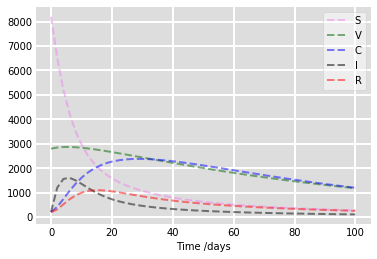

In [9]:
# Initial conditions
S0 = 8200
V0 = 2800 
C0 = 200 
I0 = 210
R0 = 200

# A grid of time points (in days)
t = np.linspace(0, 100, 50) 

#parameters
pi = 0.01
lambdda = 0.1
k = 0.5
epsilon = 0.002
tao = 0.89
phi = 0.0025
chi = 0.001
p = 0.2
theta = 0.008
mu = 0.01
alpha = 0.057
rho = 0.05
beta = 0.0115
eta = 0.2
q = 0.5
delta = 0.1


# The SIR model differential equations.
def deriv(y, t, pi, lambdda, k ,epsilon ,tao ,phi ,chi ,p ,theta ,mu ,alpha ,rho ,beta ,eta ,q ,delta):
    S ,V ,C ,I ,R = y

    dSdt = (1-p)*pi + phi*V + delta * R - (mu + lambdda + theta) * S
    dVdt = p * pi + theta * S - (mu + epsilon * lambdda + phi) * V
    dCdt = rho * lambdda * S + rho*epsilon*lambdda*V + (1-q) * eta * I - (mu + beta + chi) * C
    dIdt = (1-rho)*lambdda * S + (1-rho)*epsilon*lambdda*V+chi*C-(mu+alpha+eta)*I
    dRdt = beta * C + q*eta*I - (mu + delta)*R

    return dSdt  ,dVdt  ,dCdt  ,dIdt  ,dRdt 


# Initial conditions vector
y0 = S0 ,V0 ,C0 ,I0 ,R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(pi, lambdda, k ,epsilon ,tao ,phi ,chi ,p ,theta ,mu ,alpha ,rho ,beta ,eta ,q ,delta))
S ,V ,C ,I ,R  = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='S', linestyle='dashed')
ax.plot(t, V, 'darkgreen', alpha=0.5, lw=2, label='V', linestyle='dashed')
ax.plot(t, C, 'blue', alpha=0.5, lw=2, label='C', linestyle='dashed')
ax.plot(t, I, 'black', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, R, 'red', alpha=0.5, lw=2, label='R', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [10]:
#save to csv file
a = np.asarray([t, S ,V ,C ,I, R]) 

# np.savetxt("pneumonia.csv", a, delimiter=",")